# Question a
**Make a scatter plot, with the function lmplot (using the seaborn library), from the column cholesterol chol (y-axis) and age leeftijd (x-axis). Add then a regression line to the graph with lmplot(..,fit_reg=True).**

Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import pyreadstat

Save the dataset as a table

In [7]:
df, meta = pyreadstat.read_sav('voorbeeld7_1-1.sav')
chol1 = df.copy()
print("Data loaded successfully. First 5 rows:")
print(chol1.head())

Data loaded successfully. First 5 rows:
    id  chol  leeftijd    bmi  actief  roken  sekse  alcohol
0  1.0   7.9      66.0  27.41     1.0    0.0    1.0      0.0
1  2.0   7.5      83.0  26.85     1.0    0.0    1.0      2.0
2  3.0   7.6      84.0  27.24     1.0    0.0    1.0      2.0
3  4.0   6.0      65.0  27.50     1.0    0.0    1.0      2.0
4  5.0   6.2      56.0  27.78     1.0    0.0    1.0      0.0


Draw a scatterplot

Part (a): Scatter plot with regression line created and saved as 'cholesterol_vs_age.png'


<Figure size 1000x600 with 0 Axes>

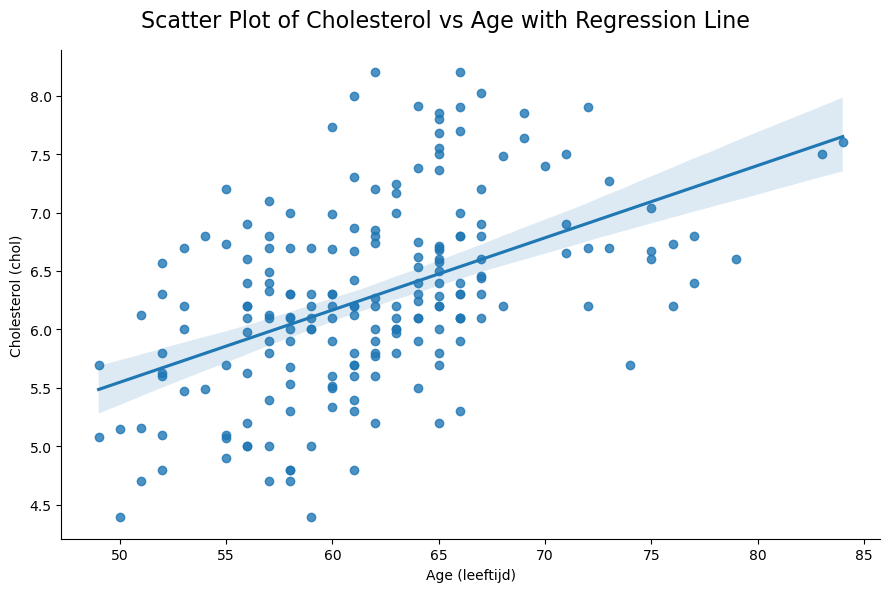

In [8]:
plt.figure(figsize=(10, 6))
plot_a = sns.lmplot(x='leeftijd', y='chol', data=chol1, height=6, aspect=1.5, fit_reg=True)
plot_a.fig.suptitle('Scatter Plot of Cholesterol vs Age with Regression Line', fontsize=16)
plot_a.set_axis_labels("Age (leeftijd)", "Cholesterol (chol)")
plt.tight_layout()
plt.savefig('cholesterol_vs_age.png')
print("Part (a): Scatter plot with regression line created and saved as 'cholesterol_vs_age.png'")

# Question B

**Fit a linear model for chol with leeftijd using the function ols (using the statsmodels library). The formula for the model is chol˜leeftijd. Save the fitobject under the name fit1. View the result with fit1.summary().**

Fit the model

In [9]:
fit1 = smf.ols(formula='chol ~ leeftijd', data=chol1).fit()
print("\nPart (b): Linear model fit1 summary (chol ~ leeftijd):")
print(fit1.summary())


Part (b): Linear model fit1 summary (chol ~ leeftijd):
                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     61.19
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           3.04e-13
Time:                        17:26:28   Log-Likelihood:                -212.39
No. Observations:                 200   AIC:                             428.8
Df Residuals:                     198   BIC:                             435.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

# Question C

**Fit a model fit2 for chol with leeftijd, bmi, sekse and alcohol. Which factors are statistically significant?**

In [11]:
fit2 = smf.ols(formula='chol ~ leeftijd + bmi + sekse + alcohol', data=chol1).fit()
print("\nPart (c): Linear model fit2 summary (chol ~ leeftijd + bmi + sekse + alcohol):")
print(fit2.summary())


Part (c): Linear model fit2 summary (chol ~ leeftijd + bmi + sekse + alcohol):
                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     31.93
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           1.83e-20
Time:                        17:30:16   Log-Likelihood:                -188.94
No. Observations:                 200   AIC:                             387.9
Df Residuals:                     195   BIC:                             404.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

To identify statistically signifant values we can use the p values (excluding intercept)

In [12]:
p_values = fit2.pvalues
significant_factors = p_values[p_values < 0.05].index.tolist()
print("\nStatistically significant factors (p < 0.05):")
for factor in significant_factors:
    if factor != 'Intercept': 
        print(f"- {factor} (p-value: {p_values[factor]:.4f})")


Statistically significant factors (p < 0.05):
- leeftijd (p-value: 0.0001)
- bmi (p-value: 0.0000)
- sekse (p-value: 0.0000)
- alcohol (p-value: 0.0015)


# Question D

**Add the residuals from the model fit2 to the table chol1 and make a histogram from the residuals.**

Adding the residuals

In [15]:
chol1['residuals'] = fit2.resid
print("\nPart (d): Added residuals to the chol1 dataframe. First 5 rows with residuals:")
print(chol1.head())


Part (d): Added residuals to the chol1 dataframe. First 5 rows with residuals:
    id  chol  leeftijd    bmi  actief  roken  sekse  alcohol  residuals
0  1.0   7.9      66.0  27.41     1.0    0.0    1.0      0.0   1.268687
1  2.0   7.5      83.0  26.85     1.0    0.0    1.0      2.0  -0.313763
2  3.0   7.6      84.0  27.24     1.0    0.0    1.0      2.0  -0.298475
3  4.0   6.0      65.0  27.50     1.0    0.0    1.0      2.0  -1.308814
4  5.0   6.2      56.0  27.78     1.0    0.0    1.0      0.0  -0.151968


Plotting

Histogram of residuals created and saved as 'residuals_histogram.png'


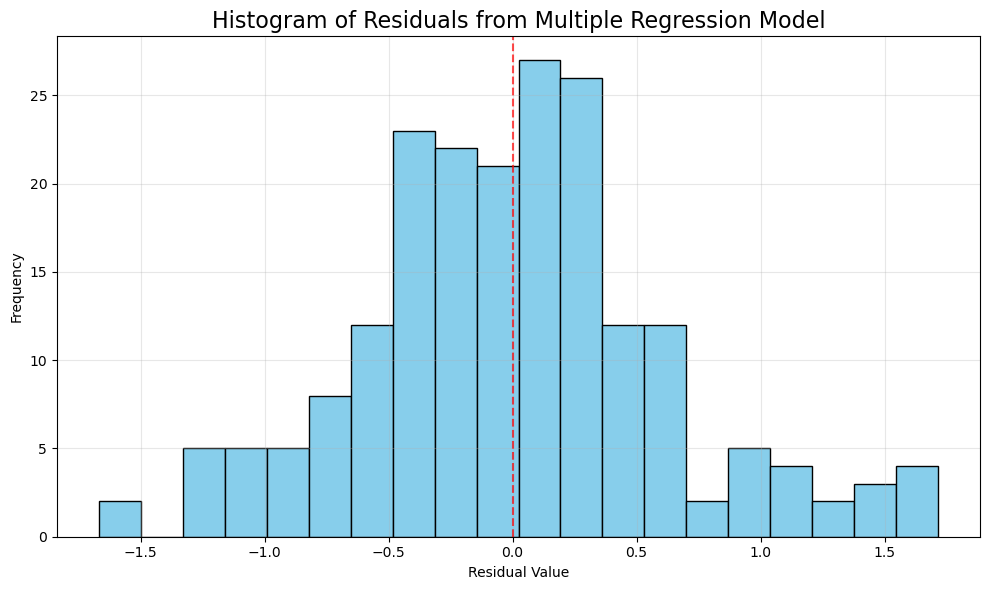

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(chol1['residuals'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals from Multiple Regression Model', fontsize=16)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)  # Add vertical line at x=0
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('residuals_histogram.png')
print("Histogram of residuals created and saved as 'residuals_histogram.png'")